In [ ]:
import os, sys , glob, math
import warnings
import shutil
warnings.filterwarnings(action='ignore')
import argparse
import pandas as pd
import seaborn as sns; sns.set(style='whitegrid')
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from PIL import Image
from tqdm import tqdm,tnrange,tqdm_notebook
import pickle


import tensorflow as tf

In [ ]:
import librosa

In [ ]:
tf.random.set_seed(123)


In [ ]:

#df = pd.read_csv('new_york_a_output.csv')
df = pd.read_csv('ny_metadata.csv')


In [ ]:
df

,id,gen,sp,ssp,group,en,rec,cnt,loc,lat,...,rmk,bird-seen,animal-seen,playback-used,temp,regnr,auto,dvc,mic,smp
0,1142,Meleagris,gallopavo,NaN,birds,Wild Turkey,Don Jones,United States,"High Point State Park, NJ",41.29232,...,Loud tut call of female,unknown,unknown,unknown,NaN,NaN,no,NaN,NaN,22050.0
1,720924,Branta,canadensis,NaN,birds,Canada Goose,Thomas Ryder Payne,Canada,"Toronto, Toronto Division, Ontario",43.67010,...,Direct overhead pass. Roof mounted CS-10EM mics.,unknown,unknown,unknown,NaN,NaN,no,NaN,NaN,48000.0
2,711380,Branta,canadensis,NaN,birds,Canada Goose,Jim Berry,United States,"Watts Flats WMA (near Panama), Chautauqua Cou...",42.01660,...,a male Canada Goose violently chase away anoth...,yes,yes,no,NaN,NaN,no,NaN,NaN,48000.0
3,608355,Branta,canadensis,NaN,birds,Canada Goose,William Whitehead,United States,"Ernest Oros Nature Preserve, Avenel, New Jersey",40.58740,...,Freshwater Pond,yes,yes,no,NaN,NaN,no,NaN,NaN,48000.0
4,606300,Branta,canadensis,NaN,birds,Canada Goose,William Whitehead,United States,"Hawk Rise Sanctuary (near Linden), Union Coun...",40.60520,...,Salt Marsh,yes,yes,no,NaN,NaN,no,NaN,NaN,48000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,161892,Mystery,mystery,NaN,birds,Identity unknown,Daniel Parker,United States,"My old yard, Croton, New York",41.20040,...,Another one of those calls I just can't rememb...,no,no,no,NaN,NaN,no,NaN,NaN,44100.0
3831,154576,Mystery,mystery,NaN,birds,Identity unknown,Daniel Parker,United States,"Road near Croton Point Park, Croton, New York",41.18220,...,I was listening to cuts in my archive and foun...,no,no,no,NaN,NaN,no,NaN,NaN,44100.0
3832,154519,Mystery,mystery,NaN,birds,Identity unknown,Daniel Parker,United States,"Yard, Croton, New York",41.19870,...,Habitat: suburban backyard. This call seems a ...,no,no,no,NaN,NaN,no,NaN,NaN,44100.0
3833,144437,Mystery,mystery,NaN,birds,Identity unknown,Daniel Parker,United States,"Yard, Croton, New York",41.19870,...,Found to be Common Raccoon.,no,no,no,NaN,NaN,no,NaN,NaN,44100.0


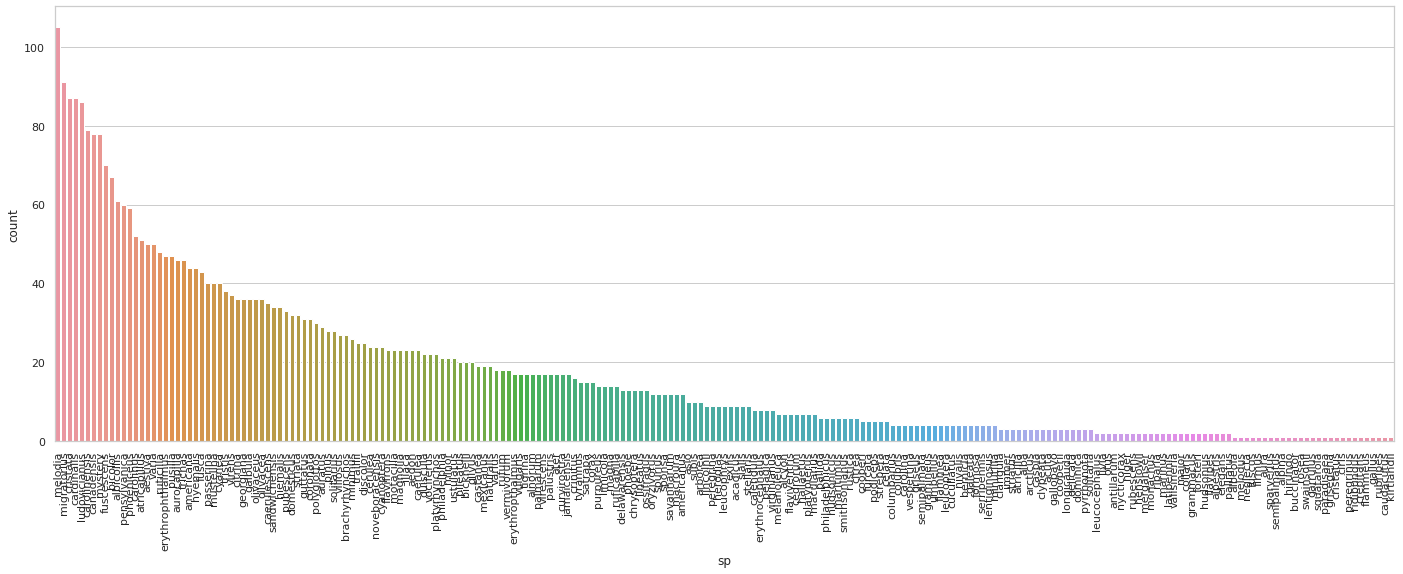

In [ ]:
fig, ax = plt.subplots(figsize=(24, 8))
sns.countplot(data= df, x='sp', ax=ax, order= df['sp'].value_counts().index)
plt.xticks(rotation=90);

In [ ]:
df.sp.unique()


array(['gallopavo', 'canadensis', 'buccinator', 'sponsa', 'americana',
       'platyrhynchos', 'rubripes', 'clangula', 'cucullatus', 'minor',
       'vociferus', 'pelagica', 'colubris', 'americanus',
       'erythropthalmus', 'macroura', 'limicola', 'carolina', 'galeata',
       'podiceps', 'grisegena', 'palliatus', 'squatarola', 'minutilla',
       'macularius', 'solitaria', 'semipalmata', 'melanoleuca',
       'ridibundus', 'atricilla', 'delawarensis', 'smithsonianus',
       'caspia', 'antillarum', 'hirundo', 'paradisaea', 'forsteri',
       'immer', 'exilis', 'virescens', 'herodias', 'aura', 'haliaetus',
       'striatus', 'lineatus', 'platypterus', 'jamaicensis', 'furcata',
       'asio', 'virginianus', 'varia', 'acadicus', 'alcyon',
       'erythrocephalus', 'carolinus', 'varius', 'pubescens', 'villosus',
       'auratus', 'pileatus', 'columbarius', 'phoebe', 'virens',
       'traillii', 'alnorum', 'minimus', 'tyrannus', 'crinitus',
       'griseus', 'flavifrons', 'solitarius', '

In [ ]:
print('NUMBER OF SPECIES IN DATA:', len(df.sp.unique()))


NUMBER OF SPECIES IN DATA: 223


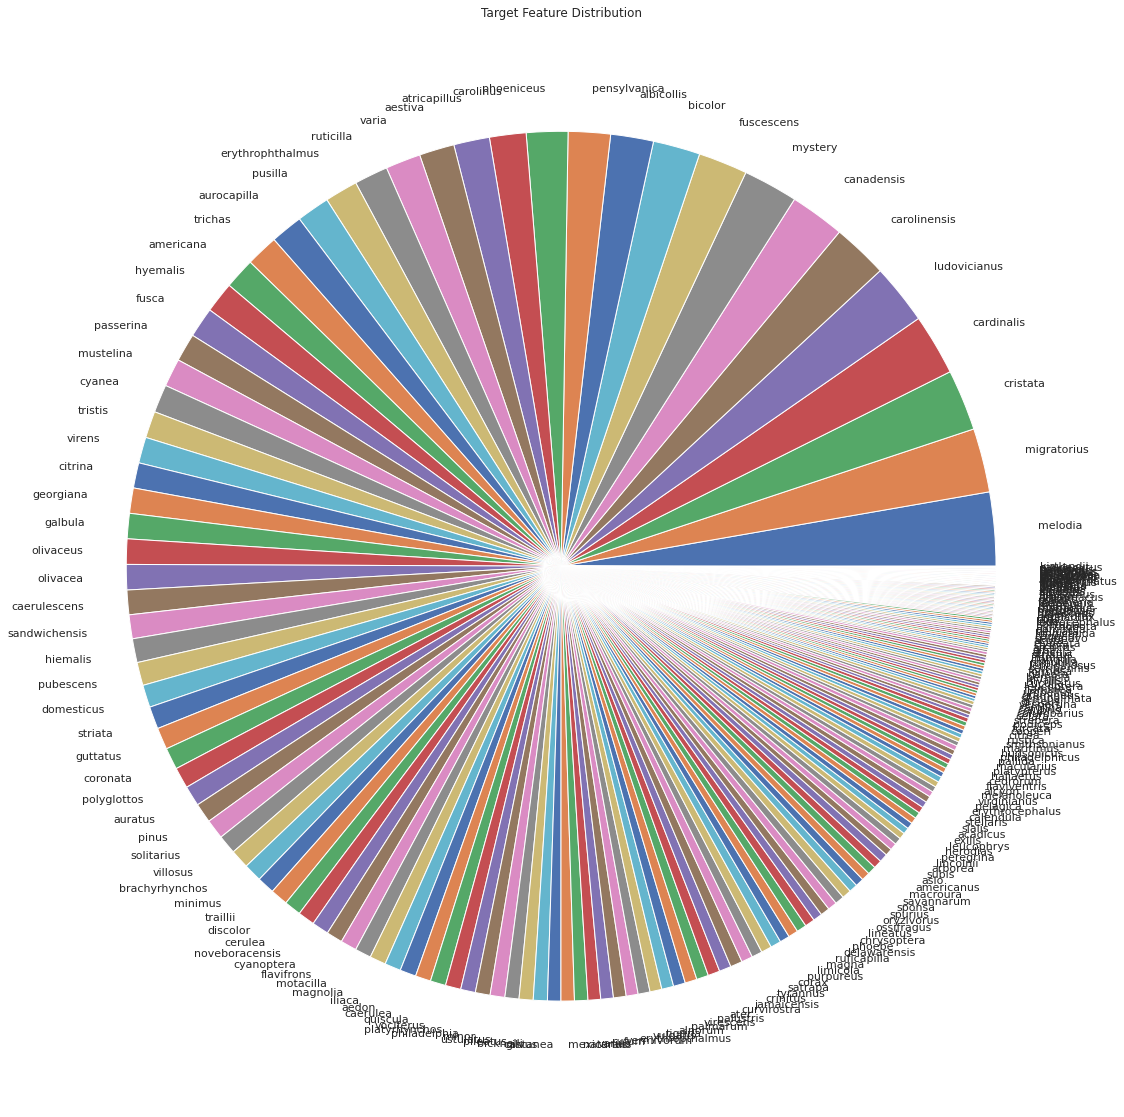

In [ ]:
target_feature_dist = df.sp.value_counts()
plt.figure(figsize = (20, 20))
plt.pie(target_feature_dist.values, labels= target_feature_dist.index)
plt.title("Target Feature Distribution")
plt.show()

In [ ]:
# save labels 
with open('LABELS.pkl','wb') as f:
    pickle.dump(LABELS,f)

In [ ]:
# Shuffle the training data 
RANDOM_SEED = 1337

TRAIN = shuffle(TRAIN, random_state=RANDOM_SEED) ## This isn't needed if using train_test_split

In [ ]:

y_train = np.array([df.id,df.sp]).T

# Get 80% of the dataset as the training set. Put the remaining 20% in temporary variables.
x_train, x_, y_train, y_ = train_test_split(df.id, df.sp, test_size=0.20, random_state=0)
# Split the 20% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=0)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_cv.shape)
print(x_test.shape)
print(y_cv.shape)
print(y_test.shape)

(3068,)
(3068,)
(383,)
(384,)
(383,)
(384,)


In [ ]:
x_train

50      548705
305     493888
2879    750310
2065    165308
2268    792219
         ...  
835     792149
3264    712727
1653    375276
2607    101914
2732    566199
Name: id, Length: 3068, dtype: int64

In [ ]:
y_train

50          carolina
305         cristata
2879          cyanea
2065     migratorius
2268         arborea
            ...     
835       phoeniceus
3264        hiemalis
1653      solitarius
2607         cerulea
2732    caerulescens
Name: sp, Length: 3068, dtype: object

In [ ]:
    #cfg.TRAIN_DATA_PATH = /projectnb/dl523/projects/BirdNet/xc_ny_soundscape
#Apply is like a for loop where it will call a function and pass the .e.g. df.id to the function being call
# lambda does an inline defining of function

df.id.apply(lambda x:f'{TRAIN_DATA_PATH}/{x}.wav').values

array(['/projectnb/dl523/projects/BirdNet/xc_ny_soundscape/1142.wav',
       '/projectnb/dl523/projects/BirdNet/xc_ny_soundscape/720924.wav',
       '/projectnb/dl523/projects/BirdNet/xc_ny_soundscape/711380.wav',
       ...,
       '/projectnb/dl523/projects/BirdNet/xc_ny_soundscape/154519.wav',
       '/projectnb/dl523/projects/BirdNet/xc_ny_soundscape/144437.wav',
       '/projectnb/dl523/projects/BirdNet/xc_ny_soundscape/128926.wav'],
      dtype=object)

In [ ]:
df = pd.read_csv('ny_metadata.csv')


In [ ]:
labels = df.sp.unique()
labels

array(['gallopavo', 'canadensis', 'buccinator', 'sponsa', 'americana',
       'platyrhynchos', 'rubripes', 'clangula', 'cucullatus', 'minor',
       'vociferus', 'pelagica', 'colubris', 'americanus',
       'erythropthalmus', 'macroura', 'limicola', 'carolina', 'galeata',
       'podiceps', 'grisegena', 'palliatus', 'squatarola', 'minutilla',
       'macularius', 'solitaria', 'semipalmata', 'melanoleuca',
       'ridibundus', 'atricilla', 'delawarensis', 'smithsonianus',
       'caspia', 'antillarum', 'hirundo', 'paradisaea', 'forsteri',
       'immer', 'exilis', 'virescens', 'herodias', 'aura', 'haliaetus',
       'striatus', 'lineatus', 'platypterus', 'jamaicensis', 'furcata',
       'asio', 'virginianus', 'varia', 'acadicus', 'alcyon',
       'erythrocephalus', 'carolinus', 'varius', 'pubescens', 'villosus',
       'auratus', 'pileatus', 'columbarius', 'phoebe', 'virens',
       'traillii', 'alnorum', 'minimus', 'tyrannus', 'crinitus',
       'griseus', 'flavifrons', 'solitarius', '

In [ ]:
nvidia-smi

NameError: name 'nvidia' is not defined